# Modeling data (with decision trees)

1. [EDA - exploratory data analysis](#section1)
2. [Build a model](#section2)

    2.1 [Define](#section2.1)    
    2.2 [Fit](#section2.2)    
    2.3 [Predict](#section2.3)    
    2.4 [Evalaute](#section2.4)
    
3. [Other models](#section3)


<div>
<img src="images/tree.jpg" width="400"/>
</div>

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [48]:
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/iris.csv'
iris_df = pd.read_csv(url)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<div>
<img src="images/iris.jpg" width="300"/>
</div>

<a id='section1'></a>

## 1. EDA

#### Get to know the data

> How many instances (rows) with each label (flower species)? Create a table

Another way to look at it - species percentage

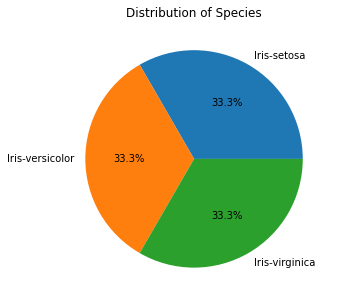

In [49]:
plt.figure(1, figsize=(5,5))
plt.title("Distribution of Species")
iris_df['class'].value_counts().plot.pie(autopct="%1.1f%%") #try removing this - what happens?
plt.ylabel("")  #try removing this - what happens?
plt.show()

> Create boxplots for each of the features
>
> use palette="gist_ncar_r"

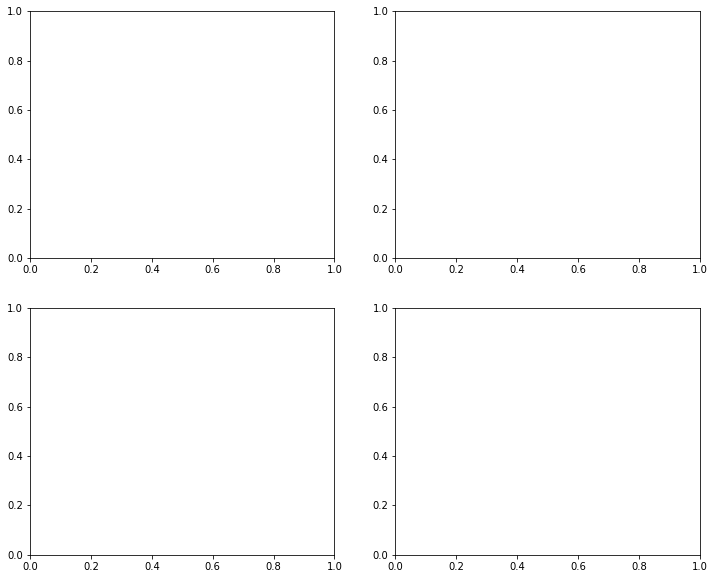

In [50]:
fig, axes = plt.subplots(2,2,figsize=(12,10))


plt.show()

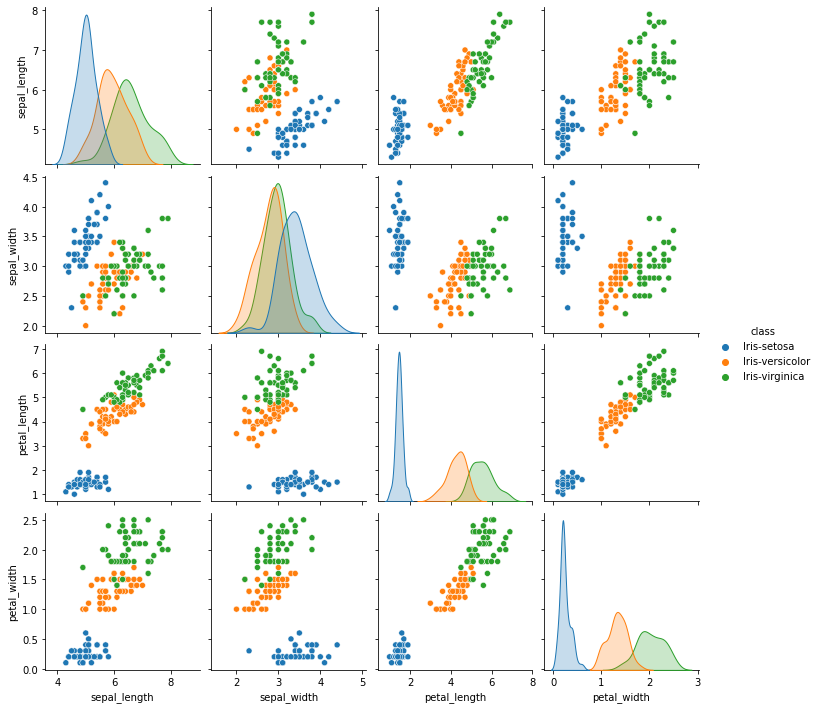

In [51]:
sns.pairplot(iris_df, hue='class')
plt.show()

> Create a heatmap to show the correlations

#### Observations

* The Sepal Width and Length are not correlated

* The Petal Width and Length are highly correlated

---
We will use all the features for training the algorithm and check the accuracy.

Then we will use one petal feature and one sepal feature to check the accuracy of the algorithm as we are using only 2 features that are not correlated. 

Thus we create variance in the dataset which may result in better accuracy. We will check it later.

<a id='section2'></a>

## 2. Build a classification model

<a id='section2.1'></a>
### 2.1 Define the model: 
we will use a decision tree based on the gini index (gini index is the default)

In [52]:
my_model = sk.tree.DecisionTreeClassifier(criterion="gini")

<a id='section2.2'></a>
### 2.2 Fit the model on the data:

Define what are the features (x) and what is the target (y)

<div>
<img src="images/x_y.PNG" width="600"/>
</div>



In [53]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris_df[features]
y = iris_df['class']

Use the model we chose on the features we chose (X and y)

In [54]:
my_model.fit(X, y)

DecisionTreeClassifier()

now model1 is a tree, and it has tree features:

In [55]:
type(my_model)

sklearn.tree._classes.DecisionTreeClassifier

Let's see what we got:

In [56]:
text_representation = tree.export_text(my_model)
print(text_representation)

|--- feature_3 <= 0.80
|   |--- class: Iris-setosa
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: Iris-virginica
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_0 <= 5.95
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_0 >  5.95
|   |   |   |   |--- class: Iris-virginica
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Iris-virginica



Vizualize:

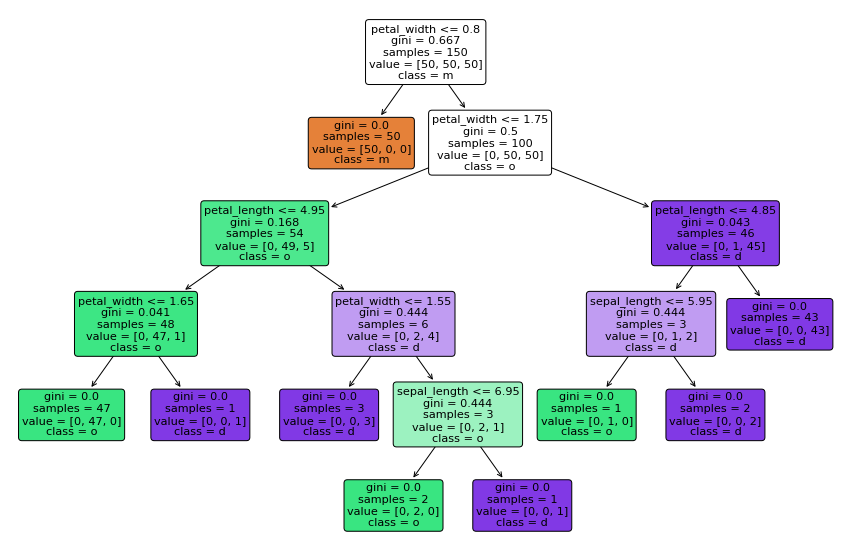

In [57]:
fig = plt.figure(figsize=(15,10))

tree.plot_tree(my_model, 
               feature_names = features, 
               class_names = 'model1.classes_',
               filled=True, 
               rounded = True)  
plt.show()

That's nice. But how well will it predict on new data?

<a id='section2.3'></a>
### 2.3 Predict

##### Split the data to 70% train set and 30% test

In [58]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=1) 

In [14]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=1) 

In [59]:
X_train.head(2)

,sepal_length,sepal_width,petal_length,petal_width
118,7.7,2.6,6.9,2.3
18,5.7,3.8,1.7,0.3


In [60]:
X_test.head()

,sepal_length,sepal_width,petal_length,petal_width
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0


In [61]:
y_test.head()

14         Iris-setosa
98     Iris-versicolor
75     Iris-versicolor
16         Iris-setosa
131     Iris-virginica
Name: class, dtype: object

##### Use the training data to train the model (a new model - model2)

In [63]:
model2 = sk.tree.DecisionTreeClassifier(criterion="gini")
model2.fit(X_train,y_train)

DecisionTreeClassifier()

##### Finally - predict:

In [65]:
prediction2 = model2.predict(X_test)
prediction2 

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

present in a nicer format:

In [67]:
df = pd.DataFrame(columns = ['class', 'predictions'])

In [68]:
df['class'] = y_test
df = df.reset_index(drop=True)

In [69]:
df['predictions'] = pd.Series(prediction2)
df

,class,predictions
0,Iris-setosa,Iris-setosa
1,Iris-versicolor,Iris-versicolor
2,Iris-versicolor,Iris-versicolor
3,Iris-setosa,Iris-setosa
4,Iris-virginica,Iris-virginica
5,Iris-versicolor,Iris-versicolor
6,Iris-virginica,Iris-virginica
7,Iris-setosa,Iris-setosa
8,Iris-setosa,Iris-setosa
9,Iris-virginica,Iris-virginica


<a id='section2.4'></a>
### 2.4 Evaluate

There are various ways to measure accuracy:

##### The most obvious - (number of correct)/(total)  

In [71]:
sk.metrics.accuracy_score(prediction2, y_test)

0.9555555555555556

##### A truth table

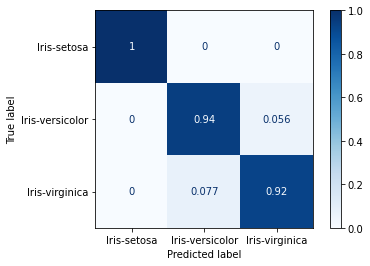

In [72]:
prediction2 = model2.predict(X_test)
cm = confusion_matrix(y_test, prediction2, labels=model2.classes_, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model2.classes_)
disp.plot(cmap=plt.cm.Blues)

##### Precision, Recall and F1 score - most common. But out of scope for this course

In [73]:
print(sk.metrics.classification_report(y_test, prediction2, target_names=model2.classes_))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



<a id='section3'></a>
## 3. Other models

#### 3.1 Petal vs Sepal

Which attributes were the most important in the training data?

In [74]:
dt = sk.tree.DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
pred = dt.predict(X_test)
acc = sk.metrics.accuracy_score(pred, y_test)

In [75]:
dt.feature_importances_

array([0.02146947, 0.02146947, 0.06316954, 0.89389153])

organize it in a nicer format:

In [76]:
feature_importances = pd.DataFrame(dt.feature_importances_,
                                   index = iris_df.columns[:4],
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head()

,importance
petal_width,0.893892
petal_length,0.063170
sepal_length,0.021469
sepal_width,0.021469


We see that petal is most important. What happens if we only use sepal?

In [77]:
X_s = iris_df[['sepal_length','sepal_width']]
y_s = iris_df['class']
X_train_s, X_test_s, y_train_s, y_test_s = sk.model_selection.train_test_split(X_s, y_s, test_size=0.3, random_state=1) 
model_s = sk.tree.DecisionTreeClassifier(criterion="gini")
model_s.fit(X_train_s, y_train_s)
prediction_s = model_s.predict(X_test_s)
print('The accuracy of the Decision Tree is',sk.metrics.accuracy_score(prediction_s,y_test_s)) 

The accuracy of the Decision Tree is 0.6444444444444445


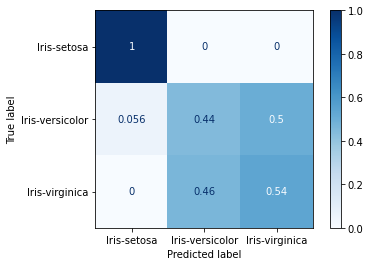

In [78]:
prediction_s = model_s.predict(X_test_s)
cm = confusion_matrix(y_test_s, prediction_s, labels=model_s.classes_, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_s.classes_)
disp.plot(cmap=plt.cm.Blues)

In [79]:
df2 = pd.DataFrame(columns = ['class', 'predictions'])
df2['class'] = y_test_s
df2 = df2.reset_index(drop=True)
df2['predictions'] = pd.Series(prediction_s) 

Now let's try a model with two features: one sepal and one petal:

In [80]:
#X_s = iris_df[['sepal_length','sepal_width']]
X_m = iris_df[['sepal_length','petal_width']]
y_m = iris_df['class']
X_train_m, X_test_m, y_train_m, y_test_m = sk.model_selection.train_test_split(X_m, y_m, test_size=0.3, random_state=1) 
model_mix = sk.tree.DecisionTreeClassifier(criterion="gini", random_state=1)
model_mix.fit(X_train_m,y_train_m)
prediction_mix = model_mix.predict(X_test_m)
print('The accuracy of the Decision Tree is',sk.metrics.accuracy_score(prediction_mix, y_test_m))

The accuracy of the Decision Tree is 0.9555555555555556


#### 3.2 an SVM model

In [81]:
from sklearn.svm import SVC
svm_model = SVC(random_state = 0)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
sk.metrics.accuracy_score(svm_pred, y_test)

0.9777777777777777

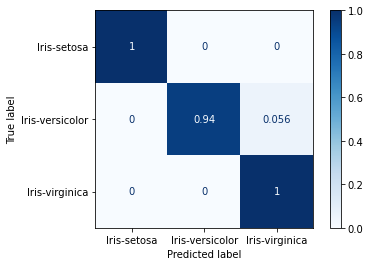

In [82]:
prediction_svm = svm_model.predict(X_test)
cm = confusion_matrix(y_test, prediction_svm, labels=svm_model.classes_, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot(cmap=plt.cm.Blues)

-----

---
> Terminology:
>
>* features - attributes
>
>* class/target - the feature we want to predict
>
>* [A guide to trees - scikit-learn](https://scikit-learn.org/stable/modules/tree.html)
>
> A summary of new functions:
>
>* `plot.pie(autopct="%1.1f%%")` - a pie plot. autopct adds percentages to each of the slices of the pie chart, 1.1 - percentages with 1 number after the decimal dot.
>
>* [DecisionTreeClassifier documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
>
>* `my_model = sk.tree.DecisionTreeClassifier(criterion="gini")` - decision tree model with the gini index as the node splitting criterion
>
>* `my_model.fit(X, y)` - train the model. X are the features and y is the target/class.
>
>* `my_model.feature_importances_` - shows how important is each of the features in model `my_model`
>
>* `sk.model_selection.train_test_split` - splits the data to train and test
>
>* `tree.export_text(my_model)` - shows the tree of the model in text format. [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_text.html)
>
>* `tree.plot_tree` - plots a nice decision tree. [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html)
>
>* [Metrics documentation](https://scikit-learn.org/stable/modules/model_evaluation.html)
>
>* `sk.metrics.accuracy_score` - computes the model's jaccard accuracy score
>
>* `sk.metrics.confusion_matrix` - a truth table
>
>* `sk.metrics.plot_confusion_matrix` - a confusion matrix
>
> 
---